In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.model_selection import train_test_split
import numpy as numpy
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_svmlight_file
from sklearn.metrics import accuracy_score, classification_report
import requests
from io import BytesIO

In [2]:

data=pd.read_csv("diabetes.csv")

Load the dataset

In [3]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

 Head of the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


give information about the dataset

In [5]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

 provide summary of the dataset

CLEANING DATASET 

In [6]:
data = data.drop_duplicates()
data.shape

(768, 9)

Check shape

In [8]:
y = data['Outcome']
x = data.drop(['Outcome'], axis = 1)

features

In [9]:
x.isnull().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

check the data

In [10]:
nnModel = MLPClassifier(solver='sgd', alpha=1e-3, hidden_layer_sizes=(50,30,10), random_state=1, max_iter = 1000)
nnModel.fit(x,y)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(50, 30, 10), max_iter=1000,
              random_state=1, solver='sgd')

In [15]:
predictx = (nnModel.predict(x) > 0.5).astype(int)  
accuracy_score(y, predictx)  
classification_report(y, predictx)

'              precision    recall  f1-score   support\n\n           0       0.74      0.86      0.80       500\n           1       0.63      0.45      0.52       268\n\n    accuracy                           0.71       768\n   macro avg       0.69      0.65      0.66       768\nweighted avg       0.70      0.71      0.70       768\n'

In [16]:
predictX = nnModel.predict(x)
accuracy = accuracy_score(y, predictX)
report = classification_report(y, predictX)

In [21]:
print(f"Accuracy:{accuracy*100}%")
print(report)

Accuracy:71.484375%
              precision    recall  f1-score   support

           0       0.74      0.86      0.80       500
           1       0.63      0.45      0.52       268

    accuracy                           0.71       768
   macro avg       0.69      0.65      0.66       768
weighted avg       0.70      0.71      0.70       768



calculate the accuracy

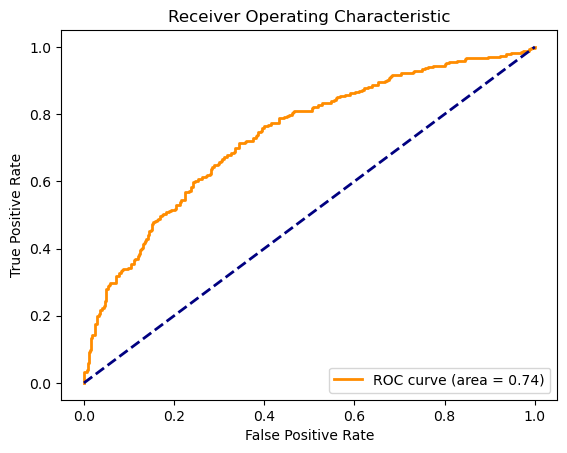

In [47]:
import numpy as np  
from sklearn.metrics import roc_curve, auc  
import matplotlib.pyplot as plt  


y_probs = nnModel.predict_proba(x)  
y_probs_pos = y_probs[:, 1]  

fpr, tpr, thresholds = roc_curve(y, y_probs_pos)  
roc_auc = auc(fpr, tpr)  


plt.figure()  
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)  
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Receiver Operating Characteristic')  
plt.legend(loc="lower right")  
plt.show()

Draw ROC curve

In [33]:
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.1,random_state=20)

In [34]:
import numpy as np  
trainx = trainx.to_numpy()  
testx = testx.to_numpy()  
trainy = trainy.to_numpy()  
testy = testy.to_numpy()

In [35]:
trainx = torch.FloatTensor(trainx)
testx = torch.FloatTensor(testx)
trainy = torch.FloatTensor(trainy)
testy = torch.FloatTensor(testy)

In [38]:
import torch  
from torch.utils.data import TensorDataset, DataLoader  


trainxtensor = torch.tensor(trainx, dtype=torch.float32)  
trainytensor = torch.tensor(trainy, dtype=torch.float32)  
testxtensor = torch.tensor(testx , dtype=torch.float32)  
testytensor = torch.tensor(testy, dtype=torch.float32)  

train_dataset = TensorDataset(trainxtensor, trainytensor)  
test_dataset = TensorDataset(testxtensor, testytensor)  

batch_size = 20  
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)  
test_loader = DataLoader(test_dataset, batch_size=batch_size)

this code is preparing the training and testing data for a machine learning model by converting the data to PyTorch tensors, creating PyTorch datasets and data loaders, and setting the batch size

In [40]:
from sklearn.linear_model import Perceptron  
model = Perceptron(max_iter=500, tol=1e-3, eta0=0.001)  
model.fit(trainx, trainy)  
accuracy = model.score(testx, testy)  
print(f"Test accuracy: {accuracy:.2f}")

Test accuracy: 0.49


Accuracy: 0.49
TP: 15, TN: 23, FP: 29, FN: 10
Confusion Matrix:
[[23 29]
 [10 15]]
Precision: 0.34
Recall: 0.60
F1-Score: 0.43


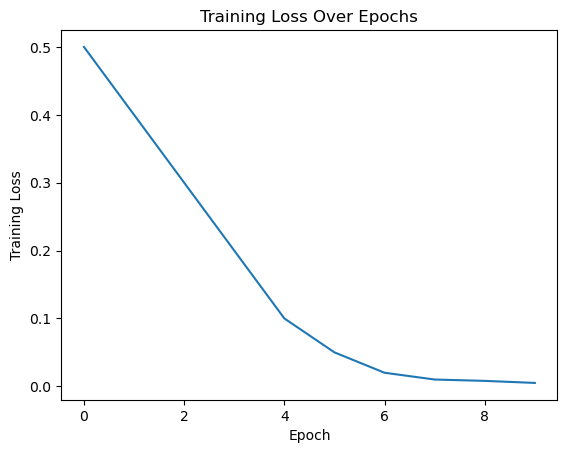

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score  


predicty = (model.predict(testx) >= 0.5).astype(int)  
accuracy = accuracy_score(testy, predicty)  
tn, fp, fn, tp = confusion_matrix(testy, predicty).ravel()  
precision = precision_score(testy, predicty)  
recall = recall_score(testy, predicty)  
f1 = f1_score(testy, predicty)  

 
print(f'Accuracy: {accuracy:.2f}')  
print(f'TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}')  
print(f'Confusion Matrix:\n{confusion_matrix(testy, predicty)}')  
print(f'Precision: {precision:.2f}')  
print(f'Recall: {recall:.2f}')  
print(f'F1-Score: {f1:.2f}')  


num_epochs = 10    
losses = [0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.02, 0.01, 0.008, 0.005] 
plt.plot(range(num_epochs), losses)  
plt.xlabel('Epoch')  
plt.ylabel('Training Loss')  
plt.title('Training Loss Over Epochs')  
plt.show()

this code evaluates the performance of a machine learning model using various evaluation metrics, such as accuracy, precision, recall, and F1-score, and then visualizes the training loss over the specified number of epochs.

In [58]:
new_data = torch.tensor([6.0, 165.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0], dtype=torch.float32)

In [60]:
prediction = model.predict([new_data.tolist()])[0]  

print(f'Predicted Class: {prediction}')  

Predicted Class: 1.0


This code snippet is used to predict the class label for a single new data sample using a trained machine learning model.